In [2]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 7)
# key = {"Milan": 12591813, "Bruselas": 55965974, "Amberes": 7153308, "Cordoba": 12602098,
#        'Lerida': 12602126, 'Madrid': 12578024, 'Valencia': 12602139 , 'Sevilla': 12602104 , 'Toledo': 12602114,
#        'Lisboa': 2346573, 'Tarragona': 12602127 , 'Zaragoza':12602107 , 'Mexico': 0 , 'Alcala':12578024,
#        'Pamplona': 12578026 , 'Coimbra': 12578026, 'Barcelona': 12578026, 'Valladolid': 12578026}

In [3]:
mod_df = pd.read_csv("data/communities/modclass0_ord1.csv", encoding="utf-8")
# ORDER - 0 3 6 5 7 1

In [4]:
mod = mod_df.groupby("Modularity Class").size()

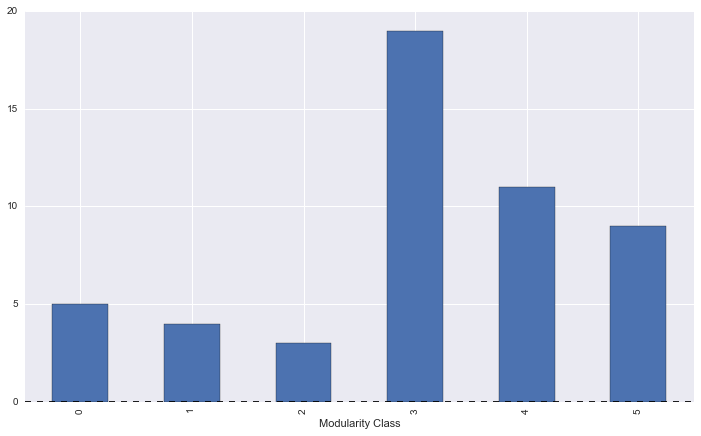

In [5]:
mod.plot(kind="bar")

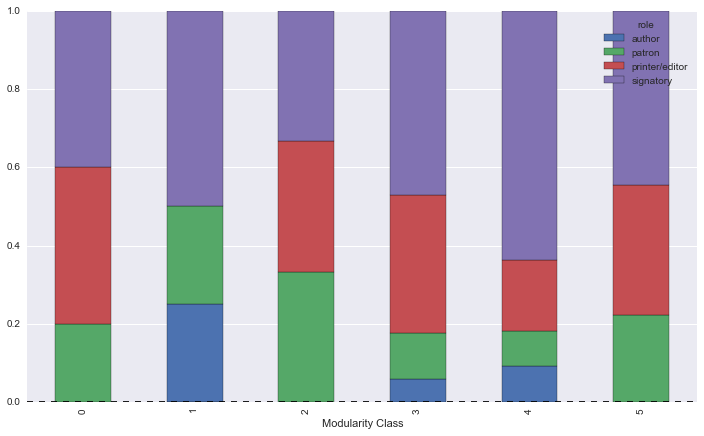

In [6]:
mod_roles = mod_df.groupby(["Modularity Class", "role"]).size()
grouped = mod_roles.groupby(level=0)
divided = mod_roles.divide(grouped.sum())
divided = divided.unstack(level=0).fillna(0)
trans = divided.transpose()
trans.plot(kind="bar", stacked=True)

In [7]:
import json
with open("maps/western_europe_data/provinces.json", "r") as f:
    prov = json.load(f)

In [8]:
# with open("maps/western_europe_data/provinces_with_id.json", "w") as f:
#     json.dump(prov, f)

In [9]:
ids = {}
for x in features:
    props = x["properties"]
    ids[props["woe_id"]] = props["gn_name"]

NameError: name 'features' is not defined

In [10]:
ids

{}

In [11]:
map_key = {"Milan": 12591813, "Bruselas": 22525998, "Amberes": 7153308, "Cordoba": 12602098,
       'Lerida': 12602126, 'Madrid': 12578024, 'Valencia': 12602139 , 'Sevilla': 12602104 , 'Toledo': 12602114,
       'Lisboa': 2346573, 'Tarragona': 12602127 , 'Zaragoza':12602107 , 'Mexico': 0 , 'Alcala':12578024,
       'Pamplona': 12578026 , 'Coimbra': 2346567, 'Barcelona': 12602124, 'Valladolid': 12602122,
       'Malaga': 12602102 , 'Burgos': 12602116, 'Roma': 12591802, 'Lyon': 12597185, 'Venetia': 12591860,
        'Medina': 12602122 , 'Salamanca': 12602119 , 'Paris': 12597155}

In [12]:
mod_places = mod_df.groupby(["Modularity Class", "top_place"]).size()

In [13]:
import csv
def write_csv(d, map_key, name):
    count = {}
    for k, v in d.items():
        id = map_key.get(k, "")
        if id:
            count.setdefault(id, 0)
            count[id] += v
    with open(name, "w") as f:
        writer = csv.writer(f)
        writer.writerow(["id", "count"])
        for k, v in count.items():
            writer.writerow([k, v])

In [34]:
mod_places[3].to_dict()

{'Amberes': 1,
 'Anvers': 2,
 'Barcelona': 1,
 'Madrid': 4,
 'Sevilla': 1,
 'Valladolid': 6}

In [24]:
write_csv(mod_places[3].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass0_mod3.csv')

In [25]:
write_csv(mod_places[4].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass0_mod4.csv')

In [26]:
write_csv(mod_places[5].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass0_mod5.csv')

In [27]:
write_csv(mod_places[0].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass0_mod0.csv')

In [28]:
write_csv(mod_places[1].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass0_mod1.csv')

In [35]:
write_csv(mod_places[2].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass0_mod2.csv')

In [150]:
mod_places

Modularity Class  top_place 
1                 Alcala         1
                  Amberes        4
                  Barcelona      4
                  Bruselas       2
                  Madrid        11
                  Sevilla        1
                  Valencia       4
                  Valladolid     6
                  Zaragoza       5
2                 Alcala         1
                  Barcelona      4
                  Lerida         1
                  Madrid        27
                  Sevilla        2
                  Toledo         1
                  Valladolid     1
3                 Barcelona      5
                  Coimbra        1
                  Lisboa         2
                  Madrid         5
                  Milan          3
                  Tarragona      2
                  Zaragoza      10
4                 Barcelona      6
                  Bruselas       4
                  Lisboa         2
                  Madrid         1
                  Pamplona